### Credit Card Transactions EDA

&nbsp;
&nbsp;


Take home test. Organize the data and give an understanding of how sticky these users are. Stickiness is to
be measured by # of weekly transactions and weeks actively transacting.
Identify the top 10 users of the group in terms of:

* **Average transactions per active week**
 
* **Weeks actively transacting**


Present the results in the way you think it’s most appropriate and easiest to digest.

Analyze the credit cycle of the top 10 users. Understand if they are more on the lending or
borrowing side. How financially exposed they are.

From your discoveries make assumptions on what type of business they are running.
Suppliers, wholesalers, retailers etc. and justify your answers.

**Github performs a static render of the notebooks and it doesn't include the embedded HTML/JavaScript that makes up a plotly graph, so cannot show over github it's interactive capabilities right now.**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv(r'dataset.csv')

In [3]:
df

,user_id,customer_id,transaction_amount,transaction_type,transaction_date
0,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,15440.0,debit,2020-09-08
1,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,1560.0,debit,2021-05-05
2,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,65750.0,debit,2020-09-14
3,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,18000.0,debit,2020-09-15
4,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,16000.0,debit,2020-09-19
...,...,...,...,...,...
18429,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,2021-08-22
18430,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,2021-07-19
18431,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,8000.0,credit,2021-05-18
18432,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,4080.0,credit,2021-05-21


In [4]:
a = df['transaction_amount']
a.isnull().values.any()#to see if the data, specifically financials, has any null values

False

* *Assign a number to each week of the year to ease weekly calculations*

In [5]:
date_a = df['transaction_date'].min()
date_z = df['transaction_date'].max()
print(date_a)
print(date_z)

2015-01-01
2021-09-09


In [6]:
df['transaction_date'][0]

'2020-09-08'

In [7]:
len(df.index)

18434

In [8]:
#create false column in the dataset to replace values with real data
df['Zodiac'] = np.zeros(18434)

* *Creating a function for the "Weeks" column*

In [9]:
import datetime
def date_to_week_no(date_a):
    dt = datetime.date(int(date_a[:4]), int(date_a[5:7]), int(date_a[-2:])).strftime("%V")#
    return dt


In [10]:
for d in range(0,18434):
    df['Zodiac'][d] = date_to_week_no(df['transaction_date'][d])
    

C:\Users\salma\AppData\Local\Temp/ipykernel_33188/3506699617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Zodiac'][d] = date_to_week_no(df['transaction_date'][d])


In [11]:
df.rename(columns = {'Zodiac':'Week No.'},inplace = True)#Rename to a more obvious label

df #Dataframe FINAL FORM

,user_id,customer_id,transaction_amount,transaction_type,transaction_date,Week No.
0,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,15440.0,debit,2020-09-08,37.0
1,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,1560.0,debit,2021-05-05,18.0
2,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,65750.0,debit,2020-09-14,38.0
3,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,18000.0,debit,2020-09-15,38.0
4,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,16000.0,debit,2020-09-19,38.0
...,...,...,...,...,...,...
18429,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,2021-08-22,33.0
18430,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,2021-07-19,29.0
18431,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,8000.0,credit,2021-05-18,20.0
18432,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,4080.0,credit,2021-05-21,20.0


In [12]:
df.isna().any()#no null values

user_id               False
customer_id           False
transaction_amount    False
transaction_type      False
transaction_date      False
Week No.              False
dtype: bool

In [13]:
df_groups = df.copy()#Making a copy of original dataframe for EDA
df_groups

,user_id,customer_id,transaction_amount,transaction_type,transaction_date,Week No.
0,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,15440.0,debit,2020-09-08,37.0
1,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,1560.0,debit,2021-05-05,18.0
2,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,65750.0,debit,2020-09-14,38.0
3,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,18000.0,debit,2020-09-15,38.0
4,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,16000.0,debit,2020-09-19,38.0
...,...,...,...,...,...,...
18429,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,2021-08-22,33.0
18430,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,2021-07-19,29.0
18431,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,8000.0,credit,2021-05-18,20.0
18432,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,4080.0,credit,2021-05-21,20.0


In [14]:
df_groups.drop(['transaction_date'], axis =1)

,user_id,customer_id,transaction_amount,transaction_type,Week No.
0,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,15440.0,debit,37.0
1,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,0Ho1KALyH5kXuU65dORt,1560.0,debit,18.0
2,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,65750.0,debit,38.0
3,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,18000.0,debit,38.0
4,ITntqIFk6zdrmI6Q4O0wEmqvnAP2,0JwwbTxOhvO3Az2HgPET,16000.0,debit,38.0
...,...,...,...,...,...
18429,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,33.0
18430,05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,ff894537-5af4-4f80-95af-47582d7c068c,100000.0,credit,29.0
18431,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,8000.0,credit,20.0
18432,4c49a7df-9c23-4f2d-8249-1fe60f6d7b25,ffdf97a2-d044-42cf-98e8-410e95f9676a,4080.0,credit,20.0


In [15]:
df_groups = df_groups.groupby(['user_id', 'customer_id', 'Week No.']).mean()

In [16]:
df_groups

transaction_amount
user_id                              customer_id                          Week No.                    
00f8b384-248e-4998-8b90-f8f6124652c5 05067d71-b8e7-4414-849b-8306b3028935 10.0                 32304.5
                                                                          12.0                  5202.0
                                                                          15.0                  4000.0
                                                                          23.0                  5062.4
                                                                          33.0                  4000.0
...                                                                                                ...
xEPNF2kCrSSe4uwhkbMxWg8b51B2         qxRDPhukyd9UCfvU3a7U                 27.0                  1500.0
                                     uV3X1XFBP6zkaFflbwcu                 27.0                 14000.0
                                     wz9IzrNAtF76bARu5pyM                 27.0                 10000.0
                                                                          28.0                  6000.0
                                     yxUGHEy9XcrKVGaYVocz                 27.0                  4000.0

[6840 rows x 1 columns]

In [17]:
df_groups1 = df_groups.groupby(['user_id', 'Week No.']).mean()

In [18]:
AAA = df_groups1.sort_values(by='transaction_amount',ascending = False).groupby('Week No.').head(10)

*Top 10 Average Transactions per active week*

In [19]:
AAA.head(10)

,,transaction_amount
user_id,Week No.,
60490330-93b3-4d20-a48c-dd26c20581e0,8.0,2.025000e+06
9cd3da80-2dce-4fdd-a2ef-fff3ec197ab8,18.0,8.346600e+05
wr3rZpxrudOZ2zcwerRvL4RmQbC2,38.0,7.750000e+05
cb8558e6-095c-476a-82b4-abbc7c864881,25.0,7.500000e+05
091d079f-7c52-4473-8641-ea757bcb8c69,17.0,7.222657e+05
f31904f4-e4cd-42d4-8a83-3e27defe3af8,43.0,6.255000e+05
9cd3da80-2dce-4fdd-a2ef-fff3ec197ab8,53.0,6.186175e+05
61b1cdeb-7453-4860-af2e-850e9339ccd3,1.0,5.555556e+05
8e8d03ce-9525-499a-93b5-82066fbc8438,27.0,5.500000e+05


In [20]:
AAA = AAA.reset_index(drop = False)

In [21]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [22]:
PDD = df_groups1.copy()
PDD = PDD.groupby(['user_id'])['transaction_amount'].agg('max')
PDD

user_id
00f8b384-248e-4998-8b90-f8f6124652c5     34584.000000
05be2ebb-6be0-4016-bcf0-e6cf77ea24c9    268000.000000
091d079f-7c52-4473-8641-ea757bcb8c69    722265.666667
09834de5-d21f-45f2-b1e9-aee2bcbb13db     13945.250000
0ecb85ab-5d6b-46a6-9a78-17b713fc54f2    106750.000000
                                            ...      
f167380c-f271-44de-a6ff-f406e3692c1a     28435.294118
f31904f4-e4cd-42d4-8a83-3e27defe3af8    625500.000000
f4f0beab-bc4d-4827-9c38-768250266212       370.000000
wr3rZpxrudOZ2zcwerRvL4RmQbC2            775000.000000
xEPNF2kCrSSe4uwhkbMxWg8b51B2              9866.666667
Name: transaction_amount, Length: 98, dtype: float64

In [23]:
PDD = PDD.to_frame()

In [24]:
PDD

,transaction_amount
user_id,
00f8b384-248e-4998-8b90-f8f6124652c5,34584.000000
05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,268000.000000
091d079f-7c52-4473-8641-ea757bcb8c69,722265.666667
09834de5-d21f-45f2-b1e9-aee2bcbb13db,13945.250000
0ecb85ab-5d6b-46a6-9a78-17b713fc54f2,106750.000000
...,...
f167380c-f271-44de-a6ff-f406e3692c1a,28435.294118
f31904f4-e4cd-42d4-8a83-3e27defe3af8,625500.000000
f4f0beab-bc4d-4827-9c38-768250266212,370.000000


In [25]:
PDD = PDD.sort_values(by = 'transaction_amount', ascending = False).reset_index(drop = False)

In [26]:
fig = px.bar(PDD.head(10), x = 'user_id',y = 'transaction_amount', title = 'Top Ten Single Week Transactions by User' ,
             height=750)
fig.show()

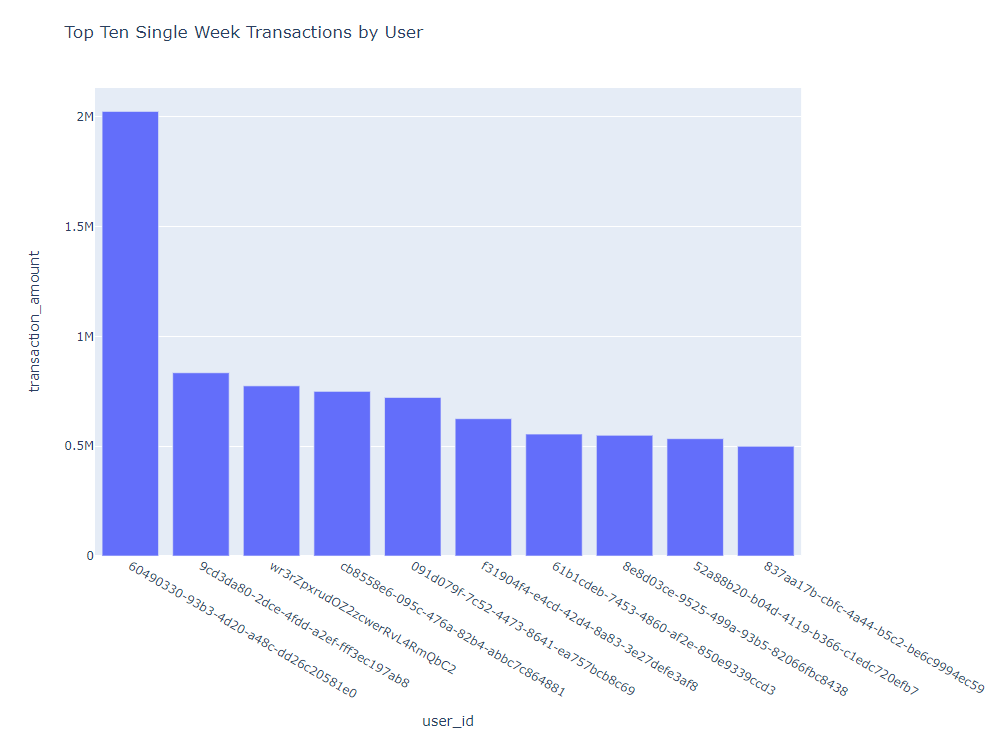

In [27]:
fig = px.bar(PDD, x = 'user_id',y = 'transaction_amount', title = 'Single Week Transactions by User' ,
             width = 1000)
fig.show()

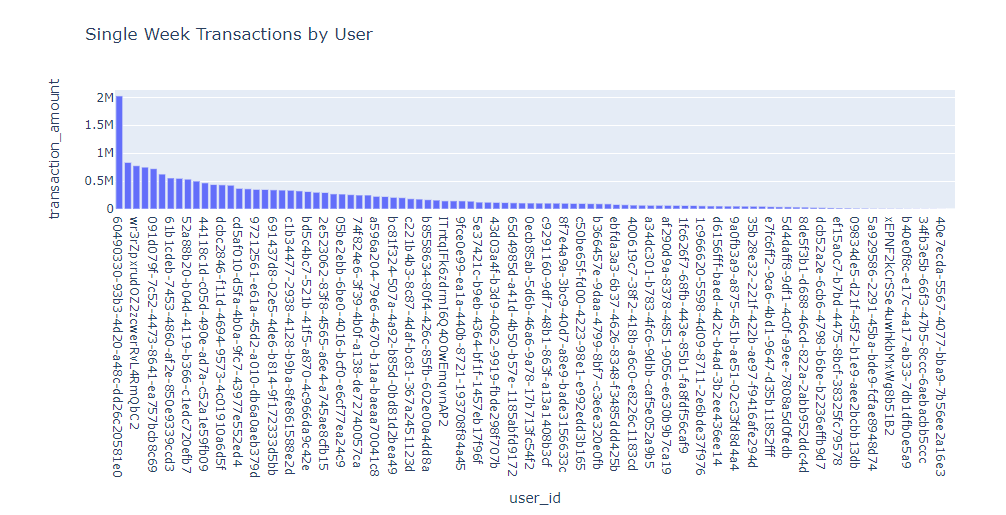

In [28]:
a = (PDD['transaction_amount'][:10].sum())/(PDD['transaction_amount'][11:98].sum())
a

0.6793013172125375

Top ten users approximately make up for 67% of all transactions

In [29]:
AAA = AAA.sort_values(by = "transaction_amount", ascending = False)

In [30]:
df_weeks = df.groupby(['user_id', 'Week No.']).size()

In [31]:
df_weeks
#Series of data with the number of transactions for that particular week, could be useful 
#for a drill down on the behaviour

user_id                               Week No.
00f8b384-248e-4998-8b90-f8f6124652c5  10.0        39
                                      12.0        33
                                      13.0         3
                                      14.0         2
                                      15.0        23
                                                  ..
wr3rZpxrudOZ2zcwerRvL4RmQbC2          36.0         2
                                      38.0         2
                                      39.0         4
xEPNF2kCrSSe4uwhkbMxWg8b51B2          27.0        49
                                      28.0         5
Length: 1118, dtype: int64

In [32]:
type(df_weeks)

pandas.core.series.Series

In [33]:
DF = df_weeks.to_frame(name= "Transactions in that Week")

In [34]:
DF.head(11)

Transactions in that Week
user_id                              Week No.                           
00f8b384-248e-4998-8b90-f8f6124652c5 10.0                             39
                                     12.0                             33
                                     13.0                              3
                                     14.0                              2
                                     15.0                             23
                                     19.0                             19
                                     22.0                             10
                                     23.0                             53
                                     30.0                             34
                                     33.0                            141
05be2ebb-6be0-4016-bcf0-e6cf77ea24c9 28.0                              4

In [35]:
DF = DF.groupby(['user_id']).size()

In [36]:
DF = DF.to_frame(name = 'No. of Active Weeks')

In [37]:
DF

,No. of Active Weeks
user_id,
00f8b384-248e-4998-8b90-f8f6124652c5,10
05be2ebb-6be0-4016-bcf0-e6cf77ea24c9,6
091d079f-7c52-4473-8641-ea757bcb8c69,4
09834de5-d21f-45f2-b1e9-aee2bcbb13db,34
0ecb85ab-5d6b-46a6-9a78-17b713fc54f2,3
...,...
f167380c-f271-44de-a6ff-f406e3692c1a,9
f31904f4-e4cd-42d4-8a83-3e27defe3af8,33
f4f0beab-bc4d-4827-9c38-768250266212,1


*Top ten users by number of weeks of active transactions*

In [38]:
Active_Weeks = DF.sort_values('No. of Active Weeks', ascending=False)
Active_Weeks.head(10)

,No. of Active Weeks
user_id,
cd5af010-d5fa-4b0a-9fc7-43977e552ed4,48
378a4c00-20d5-4fa6-8d12-38b2ef646e5b,46
ef15a0c7-b7bd-4475-8bcf-38325fc79578,45
c221b4b3-8c87-4daf-bc81-367a2451123d,37
5d4daff8-9df1-4c0f-a9ee-7808a5d0fedb,36
09834de5-d21f-45f2-b1e9-aee2bcbb13db,34
f31904f4-e4cd-42d4-8a83-3e27defe3af8,33
dcbc2846-f11d-4694-9573-4c01910a6d5f,28
1fc626f7-68fb-443e-85b1-fa8fdf56caf9,25


In [39]:
Active_Weeks = Active_Weeks.reset_index(drop = False)

In [40]:
fig = px.pie(values = Active_Weeks.head(10)['No. of Active Weeks'], names = Active_Weeks.head(10)['user_id'],
             title = "Top Ten Users by Active Weeks of Transactions", width = 1000, height = 1000)
fig.show()

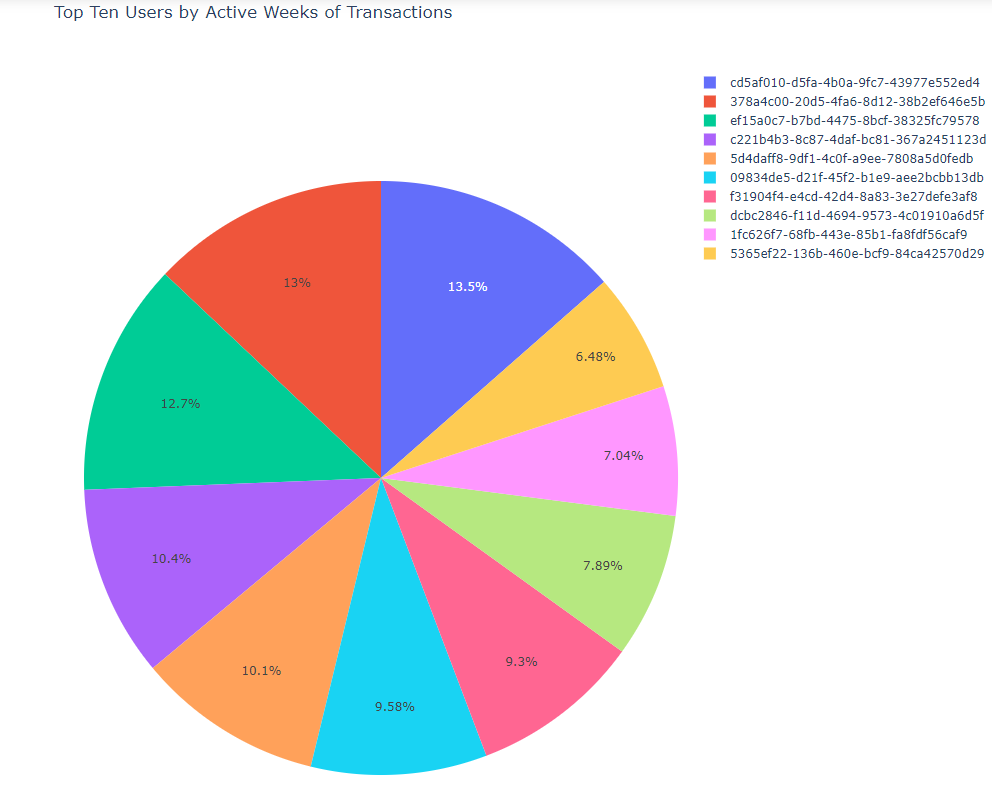

In [41]:
D_Frame = df.groupby(['user_id','transaction_type'])['transaction_amount'].agg('sum')
D_Frame = D_Frame.to_frame()

In [42]:
D_Frame

transaction_amount
user_id                              transaction_type                    
00f8b384-248e-4998-8b90-f8f6124652c5 credit                     3726125.0
                                     debit                      2250626.0
05be2ebb-6be0-4016-bcf0-e6cf77ea24c9 credit                     1372460.0
                                     debit                       120500.0
091d079f-7c52-4473-8641-ea757bcb8c69 credit                     5035702.0
...                                                                   ...
f4f0beab-bc4d-4827-9c38-768250266212 credit                         820.0
wr3rZpxrudOZ2zcwerRvL4RmQbC2         credit                     1380000.0
                                     debit                      1280000.0
xEPNF2kCrSSe4uwhkbMxWg8b51B2         credit                      468800.0
                                     debit                       786000.0

[191 rows x 1 columns]

In [43]:
D_Frame = D_Frame.sort_values(by = "transaction_amount", ascending = False)

In [44]:
D_Frame = D_Frame.reset_index(drop = False)

In [45]:
D_Frame1 = D_Frame.groupby(['transaction_type'])
#D_Frame = D_Frame.to_frame()
D_Frame1

In [46]:
D_Frame1.head(10)

,user_id,transaction_type,transaction_amount
0,378a4c00-20d5-4fa6-8d12-38b2ef646e5b,debit,9674009.0
1,f31904f4-e4cd-42d4-8a83-3e27defe3af8,debit,9646191.0
2,cd5af010-d5fa-4b0a-9fc7-43977e552ed4,debit,8798126.0
3,c221b4b3-8c87-4daf-bc81-367a2451123d,debit,8271303.0
4,ef15a0c7-b7bd-4475-8bcf-38325fc79578,debit,7636470.0
5,a596a204-79e6-4670-b1aa-baeaa70041c8,credit,7307264.0
6,d32a559d-30ca-4248-abce-f82ef0d15f2c,debit,6956950.0
7,5365ef22-136b-460e-bcf9-84ca42570d29,credit,6748145.0
8,d32a559d-30ca-4248-abce-f82ef0d15f2c,credit,6542146.0
9,ef15a0c7-b7bd-4475-8bcf-38325fc79578,credit,5889080.0


In [47]:
fig = px.bar(D_Frame1.head(60), x = 'user_id', y = 'transaction_amount', color = 'transaction_type',
             title = "Top Users by Total Credit and Debit Transactions",
             labels = {"transaction_type": "Transaction type", "transaction_amount":"Transactions (PKR)","user_id":"User"},
             height = 1000 , width = 1000)
fig.show()

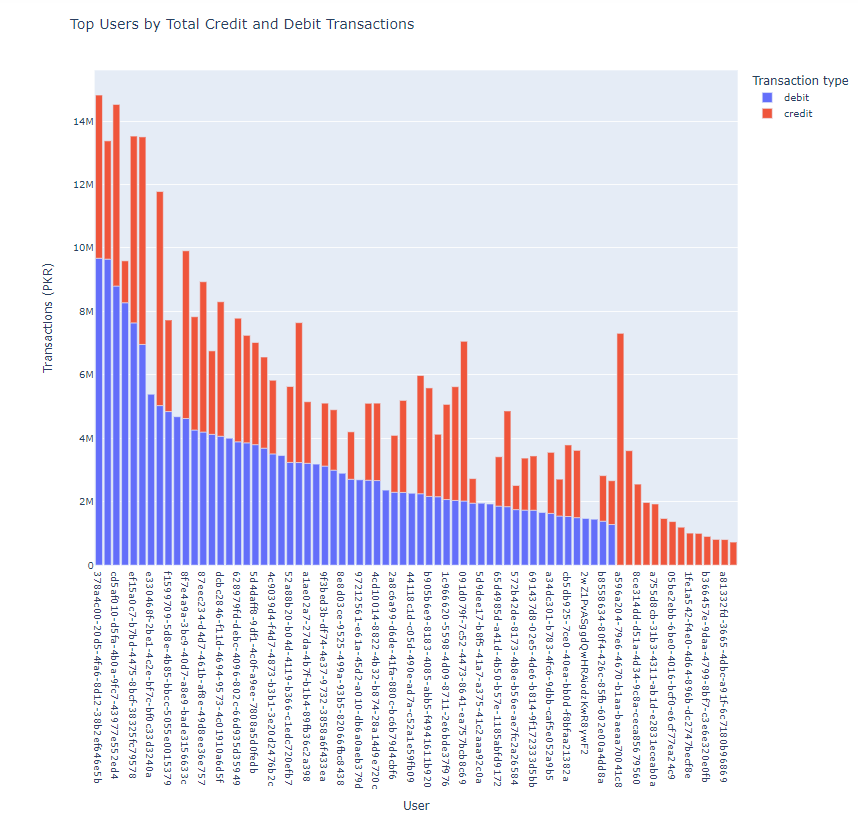

&nbsp;

**When a company's income statement is compiled, a profitable business has a surplus of *'credit'* against it's *'debit'*
indicating that the business is profitable. High debit is not always a bad thing, (it could indicate a business buying assets
and reinvesting into itself in short term) more data would be required such as the nature of customer_id**